A linear system of equations is:
 a11x1+.......+an1xn=b1,
 a12x1+.......+an2xn=b2,
 .
 .
 .
 an1x1+.......+annxn=bn
 which can be defined by Ax=B, where, A is the coefficients(a11,...ann) matrix, B is the rhs vector (b1,....,bn) and x is the matrix of variables (x1,...,xn).

Let's solve the system: 10x1-x2+2x3=6, -x1+11x2-x3+3x4=25,2x1-x2+10x3-x4=-11,3x2-x3+8x4=15


In [88]:
import sys
import os
sys.path.append(os.path.abspath("../Codes"))

from system_linear_eq.Gaussian_elimination import gauss_elimination
from system_linear_eq.Jacobi import jacobi
from system_linear_eq.Gauss_seidal import gauss_seidal
from system_linear_eq.Sor import sor
from system_linear_eq.LU_decomposition import lu_decom
from system_linear_eq.power_eigen import power
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

A=np.array([[10,-1,2,0],[-1,11,-1,3],[2,-1,10,-1],[0,3,-1,8]],dtype=float)
B=np.array([6,25,-11,15],dtype=float)
X0=np.array([0,0,0,0],dtype=float) #initial guess of x for jacobi,gauss-seidal and sor methods
tol=0.00001
w=1.1
#outputs
x_ge=gauss_elimination(A,B)
x_j,iter_j=jacobi(A,B,X0,tol,return_maxiter=True)
x_gs,iter_gs=gauss_seidal(A,B,X0,tol,return_maxiter=True)
x_sor,iter_sor=sor(A,B,X0,w,tol,return_maxiter=True)
x_lu=lu_decom(A,B)
x_exact = np.linalg.solve(A,B)


#store all outputs in a dictionary
methods={"Exact solution by linalg.solve":x_exact,
         "Gaussian elimination":x_ge,
         "Gauss-Seidal":x_gs,
         "Jacobi":x_j,
         "SOR":x_sor,
         "LU decomposition":x_lu,}

errors={name:np.linalg.norm(sol-x_exact)for name,sol in methods.items()}
sol_table=pd.DataFrame(methods,index=[f"x{i+1}" for i in range(len(B))])
er_table=pd.DataFrame.from_dict(errors,orient="index",columns=["L2 norm"])
print("Solution table:")
display(sol_table)
print("Error table:")
display(er_table)

Solution table:


,Exact solution by linalg.solve,Gaussian elimination,Gauss-Seidal,Jacobi,SOR,LU decomposition
x1,1.0,1.0,1.000001,1.000001,1.0,1.0
x2,2.0,2.0,2.000000,1.999999,2.0,2.0
x3,-1.0,-1.0,-1.000000,-0.999999,-1.0,-1.0
x4,1.0,1.0,1.000000,0.999999,1.0,1.0


Error table:


,L2 norm
Exact solution by linalg.solve,0.000000e+00
Gaussian elimination,1.110223e-16
Gauss-Seidal,6.997203e-07
Jacobi,2.285604e-06
SOR,2.797853e-07
LU decomposition,1.110223e-16


According to L2-norm, Gaussian elimination and LU decomposition gives accurate results. But, Gaussian elimination is not suitable for larger system of equations as it needs more computational time. In that case, Gauss-Seidal and SOR method gives more accurate results in less computational time.

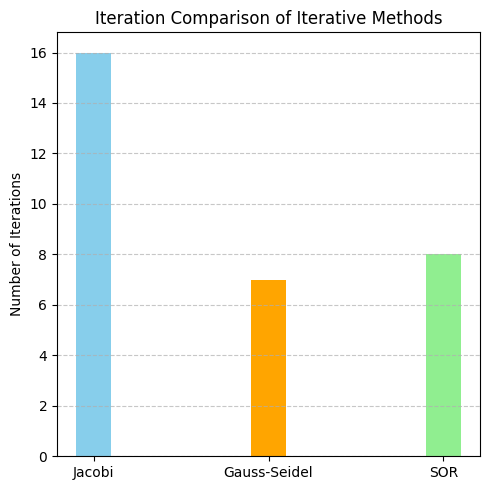

In [89]:
# Data for plotting
method = ['Jacobi', 'Gauss-Seidel', 'SOR']
iterations = [iter_j, iter_gs, iter_sor]

# Plot
plt.figure(figsize=(5,5))
plt.bar(method, iterations,width=0.2, color=['skyblue', 'orange', 'lightgreen'])
plt.title('Iteration Comparison of Iterative Methods')
plt.ylabel('Number of Iterations')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Jacobi method needs more iterations to reach desired accuracy that is more time to converge. Whereas, Gauss-Seidal and SOR methods are more efficient in timing.

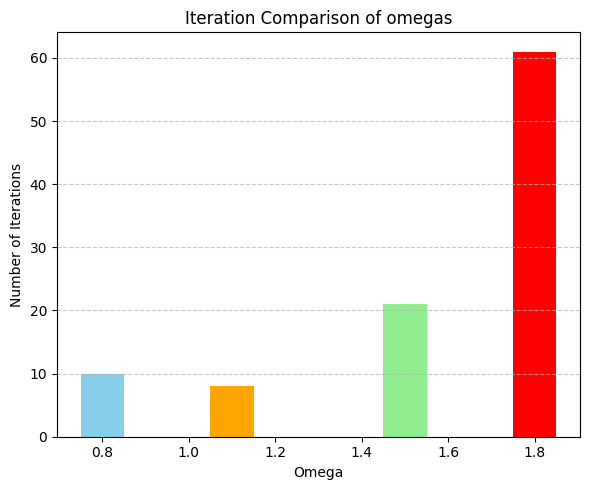

In [90]:
#comparison between omegas(SOR parameter)
omega=np.array([0.8,1.1,1.5,1.8])
iter1=np.zeros(len(omega),dtype=float)
for i in range(len(omega)):
    xsol,iter1[i]=sor(A,B,X0,omega[i],tol,return_maxiter=True)
#plot
plt.figure(figsize=(6,5))
plt.bar(omega,iter1,width=0.1,color=['skyblue', 'orange', 'lightgreen','red'])
plt.title('Iteration Comparison of omegas')
plt.ylabel('Number of Iterations')
plt.xlabel('Omega')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



The ideal range of relaxation parameter's value for faster accuracies is 1.1-1.2.

In [91]:
#eigenvalue check
x0=np.array([1,1,1,1])
eigen_p,eigen_v=power(A,x0,tol)
eigenvalues, eigenvectors = np.linalg.eig(A)
print("Dominant eigenvalue by Power method=",eigen_p)
print("Dominant eigenvalue by np.linalg.eig=",eigenvalues[0])


Dominant eigenvalue by Power method= 14.073466866647149
Dominant eigenvalue by np.linalg.eig= 14.073477752817427
